# Projet Python pour l'économiste - Julia Nicolas, Mathilde Kubiak, Clara Le Gallic-Ach


# Première étape : Webscraping 
Nous avons décidé de récupérer la majorité de nos données sur le site internet IMDb afin de travailler sur 6397 films entre 1950 et 2020. Grâce à une boucle permettant de faire défiler les pages pendant le scraping et au package BeautifulSoup4, nous constituons notre base de données rassemblant les titre, année, catégorie, genre, réalisateur, durée, metascore, score imdb, nombre de votes et chiffre d'affaire pour chacun des films. 


### Téléchargement des packages classiques et de ceux utiles au scraping

In [1]:
from requests import get
from bs4 import BeautifulSoup
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Récupération des données intéressantes d'IMDb à partir de son url 


### Création du dataframe et nettoyage de certaines données afin d'obtenir une base de travail propre

In [2]:
df = pd.read_csv(r'DFscrap.csv')
df

,Film,Année,Catégorie,Genre,Réalisateur,Durée (min),Metascore,Score imdb,Nb votes,CA($)
0,Les évadés,1994,Tous publics,Drama,Frank Darabont,142,80,93.0,2304536,28341469.0
1,The Dark Knight: Le chevalier noir,2008,Tous publics,"Action, Crime, Drama",Christopher Nolan,152,84,90.0,2268016,534858444.0
2,Inception,2010,Tous publics,"Action, Adventure, Sci-Fi",Christopher Nolan,148,74,88.0,2030088,292576195.0
3,Fight Club,1999,16,Drama,David Fincher,139,66,88.0,1826348,37030102.0
4,Pulp Fiction,1994,12,"Crime, Drama",Quentin Tarantino,154,94,89.0,1798923,107928762.0
...,...,...,...,...,...,...,...,...,...,...
7690,Braveheart,1995,Tous publics,"Biography, Drama, History",Mel Gibson,178,68,83.0,948717,75600000.0
7691,Le monde de Nemo,2003,Tous publics,"Animation, Adventure, Comedy","Andrew Stanton, Lee Unkrich",100,90,81.0,936600,380843261.0
7692,Le retour du Jedi,1983,Tous publics,"Action, Adventure, Fantasy",Richard Marquand,131,58,83.0,936428,309125409.0
7693,Iron Man,2008,Tous publics,"Action, Adventure, Sci-Fi",Jon Favreau,126,79,79.0,927922,318412101.0


# Deuxième étape : Téléchargement d'autres données pertinentes depuis les bases de données du CNC

- DF_entrées comptabilise le nombre d'entrées, les recettes des cinémas français et les recettes par entrée de 1950 à 2020.
- DF_écrans décrit le nombre d'écrans (un écran représente une salle de cinéma) par département français de 1950 à 2020.
- DF_nationalités compare le nombre d'entrées des films français, américains et autres en France de 1950 à 2020, nous allons la concaténer à DF_entrées

In [3]:
#Récupération des bases

DF_entrées = pd.read_csv('Entrées_ciné2.csv', encoding = 'utf-8',delimiter =";").dropna()
DF_écrans = pd.read_csv('nombre écrans.csv', encoding = 'utf-8',delimiter =";").dropna()
DF_nationalités = pd.read_csv('entrées nationalités.csv', encoding = 'utf-8',delimiter =";")

#Nettoyage des bases



DF_entrées['Entrées (millions)'] = DF_entrées['Entrées (millions)'].apply(lambda x: x.replace(",", ".")).apply(lambda x: float(x))
DF_entrées['Recette hors TSA (M€ courants)'] = DF_entrées['Recette hors TSA (M€ courants)'].apply(lambda x: x.replace(" ", "")).apply(lambda x: x.replace(",", ".")).apply(lambda x: float(x))
DF_entrées['Recette moyenne par entrée (€)'] = DF_entrées['Recette moyenne par entrée (€)'].apply(lambda x: x.replace(",", ".")).apply(lambda x: float(x))
DF_entrées['Année'] = DF_entrées['Année'].astype(int)

DF_nationalités['films français'] = DF_nationalités['films français'].apply(lambda x: x.replace(",", ".")).apply(lambda x: float(x))
DF_nationalités['films américains'] = DF_nationalités['films américains'].apply(lambda x: x.replace(",", ".")).apply(lambda x: float(x))
DF_nationalités['autres films'] = DF_nationalités['autres films'].apply(lambda x: x.replace(",", ".")).apply(lambda x: float(x))
DF_nationalités['Total'] = DF_nationalités['Total'].apply(lambda x: x.replace(",", ".")).apply(lambda x: float(x))
DF_nationalités['Année'] = DF_nationalités['entrées (millions)'].astype(int) 
DF_nationalités['Décennie'] = DF_nationalités['Année'].apply(lambda x:((x)//10)*10)
DF_nationalités=DF_nationalités.drop('entrées (millions)',axis=1)
DF_nationalités = DF_nationalités[DF_nationalités['Décennie']>1940]


DF_écrans.iloc[96,3:56] = DF_écrans.iloc[96,3:56].apply(lambda x: x.replace(" ", "")).apply(lambda x: int(x))

#On regroupe DF_nationalité et DF_entrées
DF_entrées = DF_entrées.merge(DF_nationalités, on ='Année').drop('Total',axis=1)




In [4]:
DF_entrées

,Année,Entrées (millions),Recette hors TSA (M€ courants),Recette moyenne par entrée (€),films français,films américains,autres films,Décennie
0,1950,370.7,39.4,0.11,167.2,157.6,45.9,1950
1,1951,372.8,50.8,0.14,175.9,149.0,47.9,1950
2,1952,359.6,59.0,0.16,175.1,132.3,52.2,1950
3,1953,370.6,63.4,0.17,174.2,128.6,67.8,1950
4,1954,382.8,69.3,0.18,179.0,130.6,73.2,1950
...,...,...,...,...,...,...,...,...
65,2015,205.4,1331.7,6.48,72.1,103.5,19.6,2010
66,2016,213.2,1388.4,6.51,75.6,111.0,19.3,2010
67,2017,209.4,1380.6,6.59,77.1,99.4,23.7,2010
68,2018,201.2,1336.9,6.64,77.8,88.0,27.2,2010


In [5]:
DF_écrans

,Numéro,Département,1966,1967,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,AIN,35,34,33,32,28,27,26,25,...,41,39,38,39,38,38,38,39,39,41
1,2,AISNE,33,31,29,27,26,25,30,30,...,43,43,43,43,43,43,43,43,43,44
2,3,ALLIER,39,38,40,39,36,35,34,35,...,24,27,26,26,25,25,26,26,26,26
3,4,ALPES-DE-HAUTE-PROVENCE,89,21,20,18,18,19,18,17,...,23,23,23,23,24,24,24,25,29,29
4,5,HAUTES-ALPES,22,16,16,15,15,16,16,16,...,34,34,34,35,34,34,35,35,35,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,92,HAUTS-DE-SEINE,70,67,67,64,63,59,54,51,...,99,100,100,98,105,113,114,113,113,113
93,93,SEINE-SAINT-DENIS,64,58,53,50,46,46,56,56,...,94,94,89,98,111,114,114,114,114,115
94,94,VAL-DE-MARNE,57,52,52,52,51,57,56,58,...,94,94,103,102,100,100,102,102,110,115
95,95,VAL-D'OISE,43,42,38,35,36,40,39,47,...,59,59,57,57,57,58,60,78,76,78


# Première partie : Que nous dit la plus grande plateforme de données filmographiques sur le monde du cinéma ?

## De quand datent les films sur lesquels nous allons travaillé ?

In [6]:
df['Décennie'] = df['Année'].apply(lambda x:((x)//10)*10)
DF_Decennies = df.groupby('Décennie').count()
DF_Decennies['Film']

Décennie
1950      94
1960     164
1970     329
1980     734
1990    1086
2000    2336
2010    2859
2020      93
Name: Film, dtype: int64

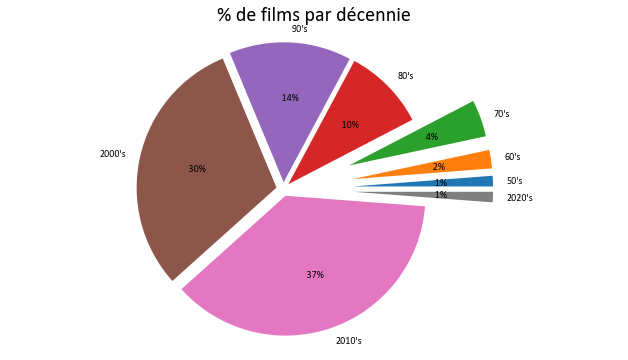

In [7]:
df['Décennie'] = df['Année'].apply(lambda x:((x-1900)//10)*10)
def Stat(gr):
    return {'min':gr.min(),'max':gr.max(),'nombre': gr.count(),'moyenne':gr.mean()}

test = df['Année'].groupby(df['Décennie']).apply(Stat).unstack()

def Label(s):
    val = (1900 + s, s)[s < 100]
    chaine = '' if s < 50 else "{}'s".format(int(val))
    return chaine

plt.rc('font', weight='medium', family='Calibri')
f, ax = plt.subplots(figsize=(11, 6))
labels = [Label(s) for s in  test.index]
sizes  = test['nombre'].values
explode = [0.5 if sizes[i] < 400 else 0.05 for i in range(8)]
ax.pie(sizes, explode = explode, labels=labels,
       autopct = lambda x:'{:4.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
ax.set_title('% de films par décennie',color='k', fontsize=20);
df['Décennie'] = df['Année'].apply(lambda x:((x)//10)*10)

Nous remarquons ici que parmi les films que nous allons étudier, la majorité est sortie entre 1990 et 2019. 

## Etudions maintenant le genre de ces films

In [8]:
df.Genre

0                              Drama            
1               Action, Crime, Drama            
2          Action, Adventure, Sci-Fi            
3                              Drama            
4                       Crime, Drama            
                          ...                   
7690       Biography, Drama, History            
7691    Animation, Adventure, Comedy            
7692      Action, Adventure, Fantasy            
7693       Action, Adventure, Sci-Fi            
7694     Animation, Adventure, Drama            
Name: Genre, Length: 7695, dtype: object

### Nous remarquons que les genres sont regroupés dans un grand nombre de combinaisons. Nous décidons de procéder à de l'encodage One Hot afin de faire apparaitre des catégories générales de genre. 

In [9]:
#Choix des familles de genre
Mots = ['Drama', 'Comedy','Action','Thriller','Adventure','Biography','Sci-Fi','Fantasy','History','Animation','Crime','War','Mystery','Family','Romance']

In [10]:
#Création d'une fonction repérant l'appartenance d'un film à un ou plusieurs genres
def one_hot_genre (df, mots):
    
    A = df.copy()
    
    # Crée de nouvelles colonnes qui serviront pour le 1 hot encoding des genres
    for mot in mots:
        A[mot] = 0 # Initilise à 0 pour tous les genres
    A['Indéfini'] = 0
        
    # On parcourt ensuite les lignes du dataframe et on vérifie la présence de chaque genre 
    
    for index, genre in enumerate(A.Genre):
    
        indefini = True
        if type(genre) == str :
            for mot in mots :
                if mot in genre :
                    indefini = False
                    A.loc[index, mot] = 1
        elif indefini :
            A.loc[index, 'Indéfini'] = 1
    
    return A

In [11]:
#On applique cette fonction à notre dataframe

df_Genre_oneHot=one_hot_genre(df, Mots).dropna().drop('Indéfini',axis=1)

In [12]:
Genre_films = df_Genre_oneHot[(Mots)]

s=Genre_films.sum(axis = 0, skipna = True)
s.sort_values(ascending = False)

Drama        3564
Comedy       2467
Action       1545
Crime        1238
Adventure    1201
Romance      1153
Thriller     1021
Mystery       582
Fantasy       527
Biography     484
Sci-Fi        475
Family        379
Animation     315
History       209
War           123
dtype: int64

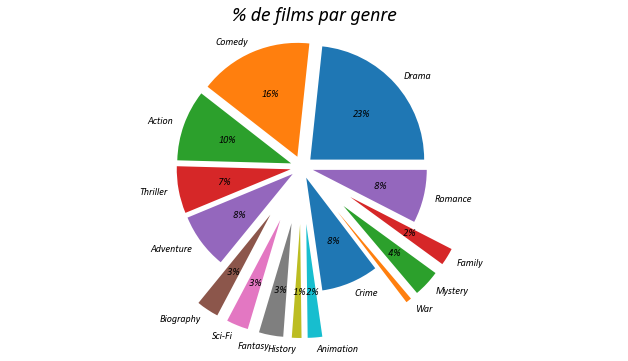

In [13]:
plt.rc('font', weight='medium', family='Calibri', style='oblique')


labels=Mots
f, ax = plt.subplots(figsize=(11, 6))
explode= [0.5 if s[i] < 600 else 0.1 for i in range(15)]
ax.pie(s, explode=explode, labels=labels,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False)
ax.axis('equal')
ax.set_title('% de films par genre',color='k', fontsize=20);

Dans les graphiques suivants, nous regroupons les films par année ou par décennie selon la lisibilité du graphique final. En effet l'étude annuelle montre une grande variation des données souvent illisible sur les graphiques où nous étudions déjà plusieurs variables. 

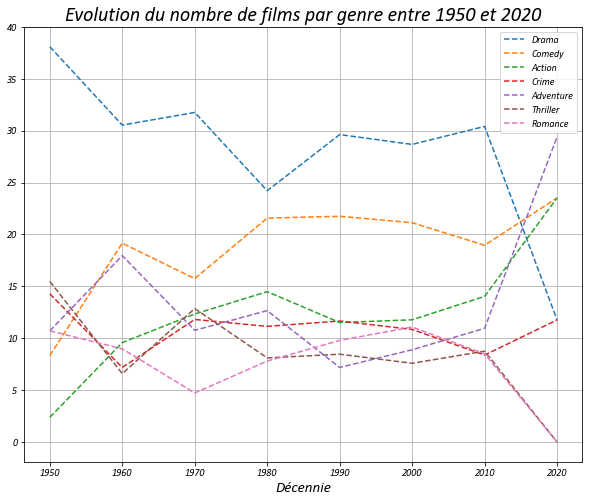

In [14]:
Mots2=['Drama','Comedy','Action','Crime','Adventure','Thriller','Romance']
DF_emergence = df_Genre_oneHot.groupby('Décennie').sum()
fig = plt.figure(figsize=(10,8))
DF_emergence ['Total'] = DF_emergence[Mots2].sum(axis=1)
ax1 = plt.subplot(1,1,1)
#On plotte sur le même graphe la plupart des caractéristiques de notre jeu de données
for colonne in DF_emergence[Mots2] :
    
    ax1 = plt.plot((DF_emergence[colonne]/DF_emergence.Total)*100, marker='', linestyle ='--', label=colonne)
   
plt.grid('y')

plt.xlabel("Décennie", fontsize = 15)
#plt.ylabel("", fontsize = 15)
plt.legend(loc='best')
plt.title("Evolution du nombre de films par genre entre 1950 et 2020", fontsize=20)
plt.show()

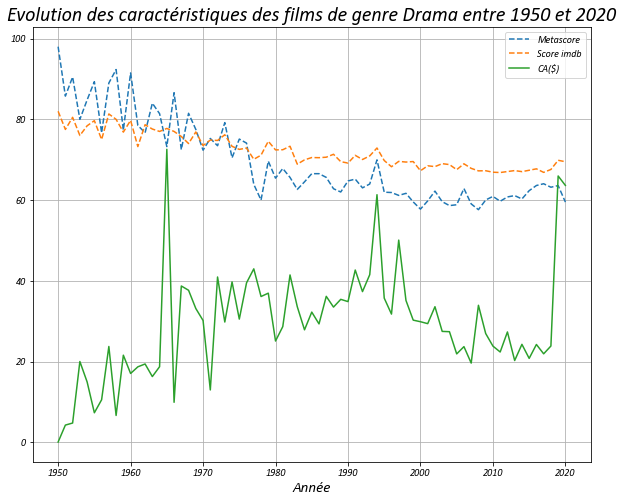

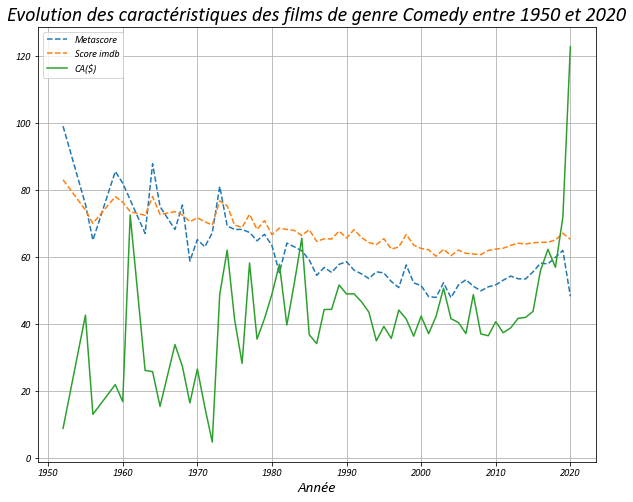

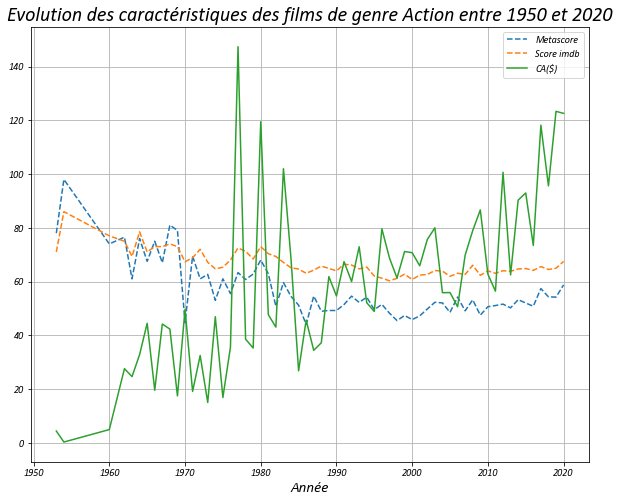

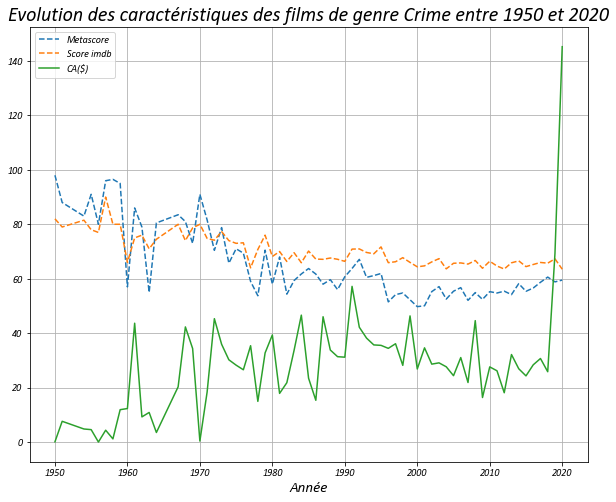

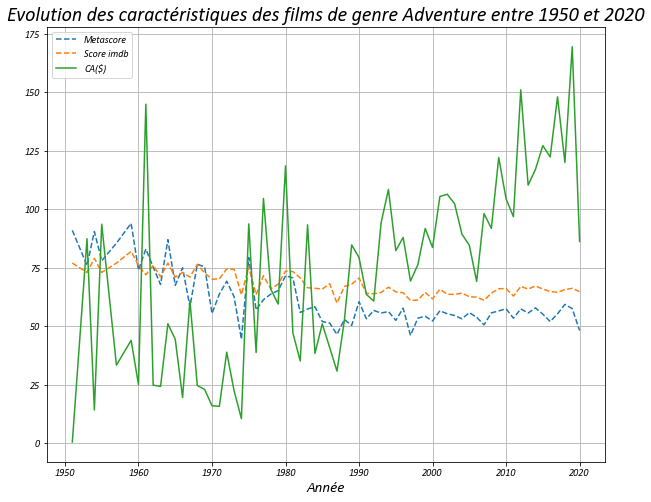

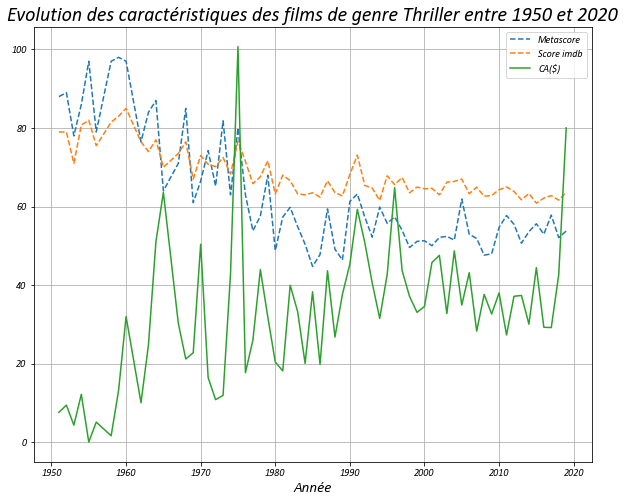

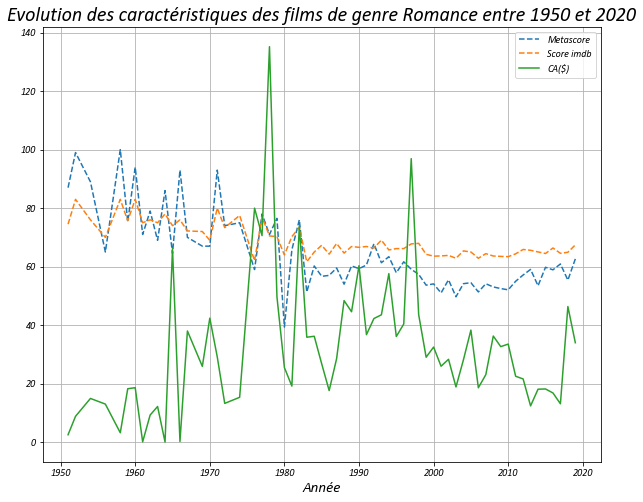

In [15]:
df_Genre_oneHot[Mots2]
Critères = ['Année','Film','Metascore','Score imdb','Nb votes','CA($)']
DF_Genre = pd.DataFrame(index=Critères)
a=[]
for colonne in df_Genre_oneHot[Mots2] :
    df_moyen = df_Genre_oneHot.set_index(colonne)
    df_moyen = df_moyen.drop(colonne==0)
    df_moyen = df_moyen[Critères].sort_values(by='Année').dropna()
    df_moyen=df_moyen.groupby('Année').mean()
    fig = plt.figure(figsize=(10,8))

    ax1 = plt.subplot(1,1,1)
#On plotte sur le même graphe la plupart des caractéristiques de notre jeu de données
    ax1 = plt.plot(df_moyen['Metascore'], marker='', linestyle ='--', label='Metascore')
    ax1 = plt.plot(df_moyen['Score imdb'], marker='', linestyle ='--', label='Score imdb')
    ax1 = plt.plot(df_moyen['CA($)']/1000000, marker='', linestyle ='-', label='CA($)')


    plt.grid('y')

    plt.xlabel("Année", fontsize = 15)
#plt.ylabel("", fontsize = 15)
    plt.legend(loc='best')
    plt.title("Evolution des caractéristiques des films de genre "+str(colonne)+" entre 1950 et 2020", fontsize=20)
    plt.show()

In [16]:
# Moyenne des chiffres d'affaires pour chaque réalisateur 

tableau_realisateur = df["Réalisateur"].unique()
len(tableau_realisateur)
tableau_realisateur
type(tableau_realisateur)
R = list(tableau_realisateur)


# Programme qui permet d'afficher les films d'1 seul réalisateur

def groupe_réalisateur(i) :
  df_bis = df[df['Réalisateur'] == i]
  return df_bis

# Fais la moyenne des chiffres d'affaires pour un seul réalisateur

def chiffre_affaire_moyen(i) :
  return groupe_réalisateur(i)['CA($)'].mean()

# On crée la liste des moyennes des chiffres d'affaire pour chaque réalisateur 

L = []
for i in tableau_realisateur :
  L.append(chiffre_affaire_moyen(i))

def metascore_moyen(i) :
  return groupe_réalisateur(i)['Metascore'].mean()

M = []
for i in tableau_realisateur:
  M.append(metascore_moyen(i))

def Score_public_moyen(i) :
  return groupe_réalisateur(i)['Score imdb'].mean()

S = []
for i in tableau_realisateur:
  S.append(Score_public_moyen(i))

# On crée le tableau avec les réalisateurs et leur chiffre d'affaire moyen sur l'ensemble de leurs films

data = [R,L,M,S]
index = ['Réalisateur','Chiffre d affaire moyen','Metascore moyen','Score public moyen']
df_rea_CAmoyen = (pd.DataFrame(data=data,index=index)).T
rea_CAmoyen_trie = df_rea_CAmoyen.sort_values(by=['Chiffre d affaire moyen'],ascending=False)
VRAI = rea_CAmoyen_trie.dropna()
VRAI.head(10)

,Réalisateur,Chiffre d affaire moyen,Metascore moyen,Score public moyen
348,"Andrew Stanton, Angus MacLane",4.86296e+08,77,73
111,"Chris Buck, Jennifer Lee",4.39056e+08,69.5,71.5
178,"Andrew Adamson, Kelly Asbury, Conrad Vernon",4.36471e+08,75,72
435,Josh Cooley,4.34038e+08,84,78
28,"Roger Allers, Rob Minkoff",4.22784e+08,88,85
52,Lee Unkrich,4.15005e+08,92,83
25,"Andrew Stanton, Lee Unkrich",3.80843e+08,90,81
44,"Anthony Russo, Joe Russo",3.80167e+08,66.3333,73.8333
470,"Chris Renaud, Yarrow Cheney",3.68384e+08,61,65
39,J.J. Abrams,3.66568e+08,70.8333,73.3333


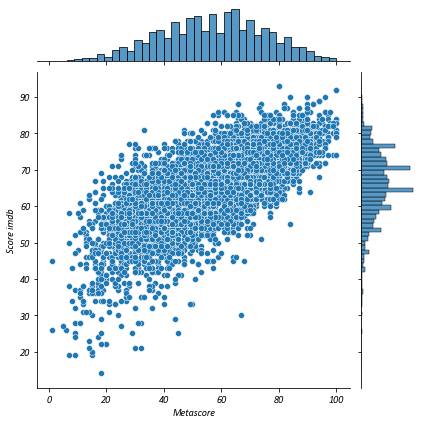

In [17]:
sns.jointplot(data=df, x='Metascore', y='Score imdb')



On remarque une forte concentration autour d'une droite. On peut déduire de ce graphe qu'il y a une certains cohérence entre l'avis des spectateurs et des critiques. Cependant on remarque qu'en général les spectateurs donnent de meilleures notes que les critiques.

On peut maintenant essayer de mettre en avant un lien entre le succès d'un film et son chiffre d'affaire. Représentons dans un graphe le succès des films auprès des critiques et leur chiffre d'affaires.

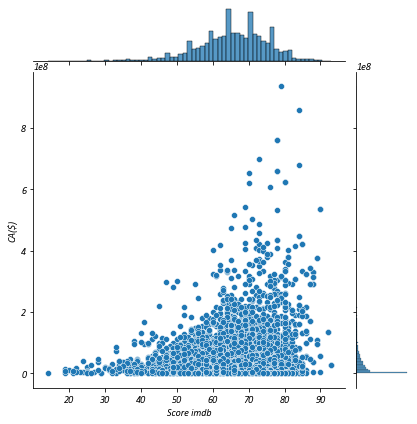

In [18]:
sns.jointplot(data=df, x='Score imdb', y="CA($)")

De manière assez évidente, ce graphe nous montre que les films avec le plus gros chiffres d'affaires sont aussi les mieux notés par les spectateurs.

On peut aussi mettre en avant un lien entre le chiffre d'affaire et les critiques des media ("des professionnels").

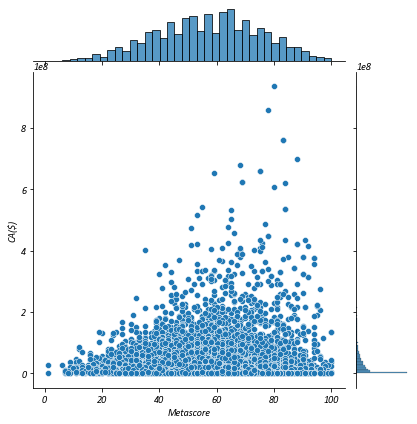

In [19]:
sns.jointplot(data=df, x='Metascore', y="CA($)")

Le lien quand on s'intéresse à l'avis des critiques professionnels est moins clair. En effet, des films très bien notés par ces derniers n'ont pas toujours un chiffre d'affaire considérable, tandis que certains films moins bien notés selon les critiques semblent eux avoir récolté un chiffre d'affaire très important.

Cette différence entre les avis des spectacteurs et ceux des critiques nous suggèrent de s'intéresser à la forme de leur distribution.

Le premier graphe que nous avons représenté nous suggère que les spectateurs sont plus indulgents généralement avec les films : pour un film fixé, les avis seront globalement plus positifs et les notes des spectateurs plus élevées que les avis des critiques. On peut aussi s'intéresser à l'écart-type de ces avis : les avis des spectateurs sont-ils plus hétérogènes que ceux des critiques ?

C:\Users\Clara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Clara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score imdb', ylabel='Density'>

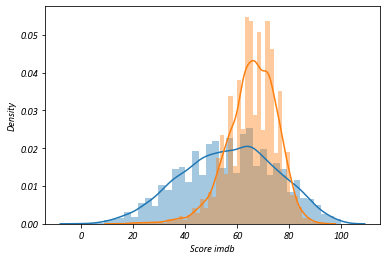

In [20]:
sns.distplot(df.Metascore)
sns.distplot(df['Score imdb'])

On réunit sur un même graphe la répartition des notes des spectateurs avec celle des critiques. En bleu se trouve la répartition des notes des critiques et en orange celle des notes des spectateurs.

On retrouve le fait que les spectateurs donnent en moyenne des meilleures notes que les critiques, mais les écarts-types sont bien différents : les notes des spectateurs sont finalement plus semblables entre elles tandis que les avis des critiques semblent plus hétérogènes (les écarts à la moyenne sont en moyenne plus grands).

Etudions alors l'évolution des notes données en général aux films, ainsi que le nombre de votes afin d'évaluer la pertinence du 'score imdb' basé sur les utilisateurs du site. Nous allons également regardé l'évolution du chiffre d'affaire moyen. 

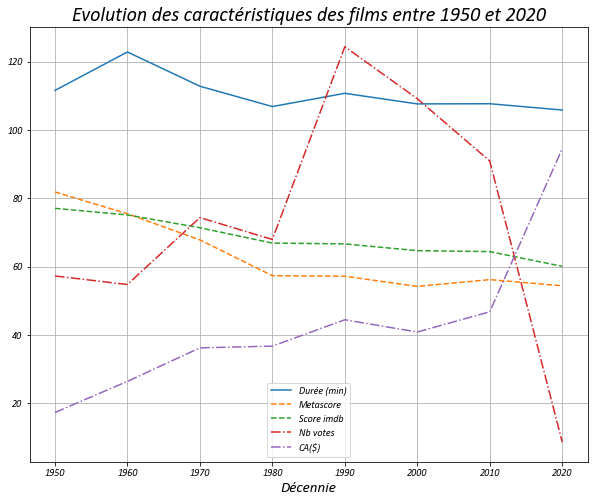

In [21]:
DF_Decennies = df.groupby('Décennie').mean()
fig = plt.figure(figsize=(10,8))

ax1 = plt.subplot(1,1,1)
#On plotte sur le même graphe la plupart des caractéristiques de notre jeu de données
ax1 = plt.plot(DF_Decennies['Durée (min)'], marker='', linestyle ='solid', label='Durée (min)')
ax1 = plt.plot(DF_Decennies['Metascore'], marker='', linestyle ='--', label='Metascore')
ax1 = plt.plot(DF_Decennies['Score imdb'], marker='', linestyle ='--', label='Score imdb')
ax1 = plt.plot(DF_Decennies['Nb votes']/1000, marker='', linestyle ='-.', label='Nb votes')
ax1 = plt.plot(DF_Decennies['CA($)']/1000000, marker='', linestyle ='-.', label='CA($)')


plt.grid('y')

plt.xlabel("Décennie", fontsize = 15)
#plt.ylabel("", fontsize = 15)
plt.legend(loc='best')
plt.title("Evolution des caractéristiques des films entre 1950 et 2020", fontsize=20)
plt.show()

Nous remarquons une baisse générale des notes données aux films alors que nous avions précédemment vu que la majorité des films dataient des dernières années. Le cinéma est-il devenu une industrie privilégiant la quantité à qualité ? 
Il parait également pertinent de se poser cette question tant on remarque en parallèle une explosion du chiffre d'affaire généré par cette industrie. 

Par ailleurs nous remarquons une explosion du nombre de votes des visiteurs d'IMDb dans les années 1990. Le site ayant été créé en 1990, nous pouvons supposer que les premiers films arrivés sur la plateforme sont ceux de cette décennie et que plus de gens ont vu ces films que ceux sortis dernièrement. 

## Afin de mieux comprendre l'évolution de l'industrie cinématographique du côté des spectateurs et de celui des producteurs et distributeurs, nous allons nous intéresser à l'exemple français. 

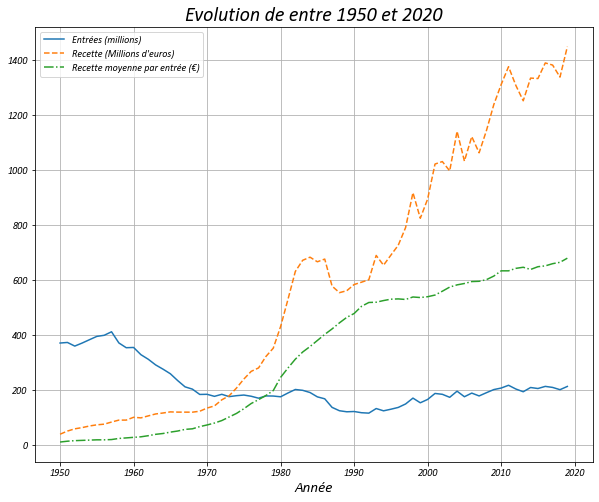

In [22]:
fig = plt.figure(figsize=(10,8))

DF_entrées = DF_entrées.set_index('Année')

ax1 = plt.subplot(1,1,1)
#On plotte sur le même graphe la plupart des caractéristiques de notre jeu de données
ax1 = plt.plot(DF_entrées['Entrées (millions)'], marker='', linestyle ='solid', label='Entrées (millions)')
ax1 = plt.plot(DF_entrées['Recette hors TSA (M€ courants)'], marker='', linestyle ='--', label="Recette (Millions d'euros)")
ax1 = plt.plot(DF_entrées['Recette moyenne par entrée (€)']*100, marker='', linestyle ='-.', label='Recette moyenne par entrée (€)')



plt.grid('y')

plt.xlabel("Année", fontsize = 15)
#plt.ylabel("", fontsize = 15)
plt.legend(loc='best')
plt.title("Evolution de entre 1950 et 2020", fontsize=20)
plt.show()

Nous remarquons tout d'abord une baisse du nombre d'entrées moyen en salle. Entre les années 1950 et 2020, ce nombre a été divisé par deux. Il connait cependant une nouvelle croissance depuis les années 1990 et 2000 qu'il parait intéressant d'étudier. 

Mais la tendance la plus flagrante de ce graphique reste l'explosion des recettes perçues aux guichets des cinémas ainsi que les recettes moyennes par entrée. Nous devinons notamment une hausse conséquente du prix du billet pour une séance.

Text(0.5, 0, 'Décennies')

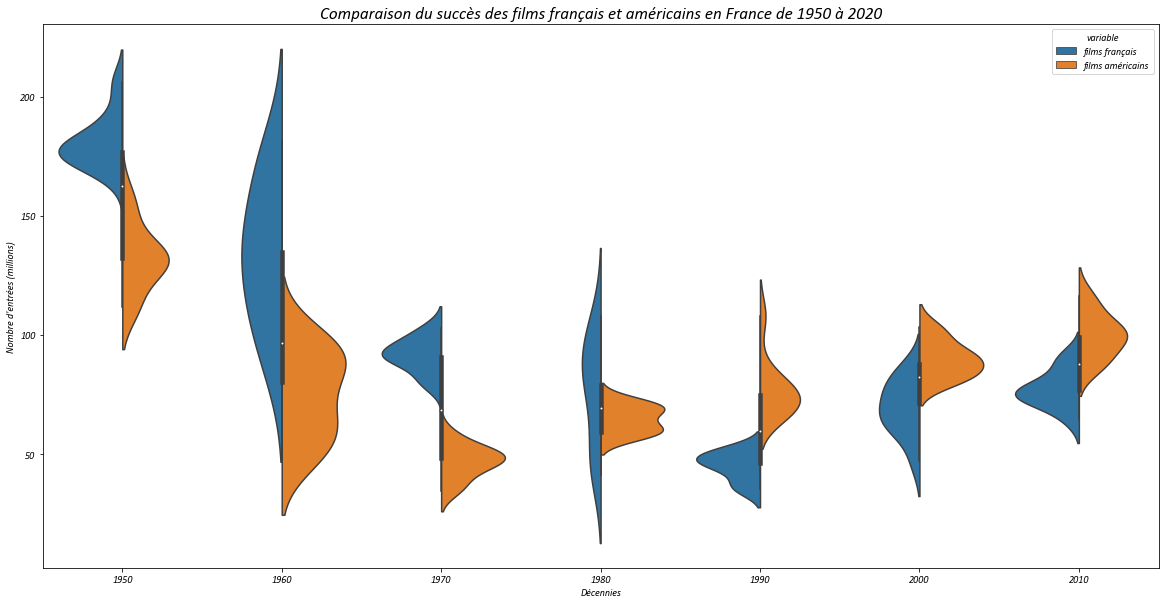

In [23]:
DF_violin = DF_nationalités.melt(id_vars =['Décennie'], value_vars =['films français','films américains'])
plt.figure(figsize=(20,10))
sns.violinplot(data = DF_violin, x='Décennie', y='value',hue='variable',split=True)
plt.title("Comparaison du succès des films français et américains en France de 1950 à 2020", fontsize = 17)
plt.ylabel("Nombre d'entrées (millions)")
plt.xlabel("Décennies")

In [ ]:
DF_entrées=DF_entrées.reset_index()
DF_entrées2000_2020 = DF_entrées[DF_entrées['Année']>=2000]
DF_entrées2000_2020 = DF_entrées2000_2020.set_index('Année')

Text(0.5, 1.0, "Comment expliquer la grande variation du nombre d'entrées annuel en France ? ")

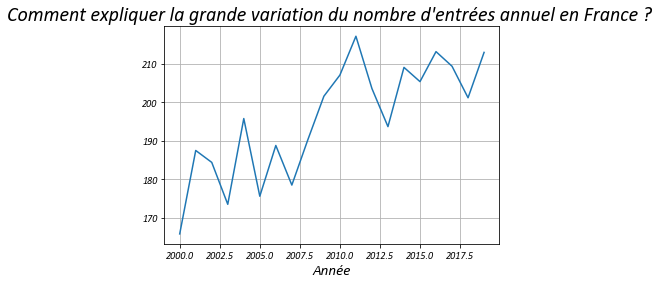

In [28]:

plt.plot(DF_entrées2000_2020['Entrées (millions)'], marker='', linestyle ='solid', label='Entrées (millions)')

plt.grid('y')

plt.xlabel("Année", fontsize = 15)
#plt.ylabel("", fontsize = 15)
plt.title("Comment expliquer la grande variation du nombre d'entrées annuel en France ? ", fontsize=20)

Pics correspondent à des gros succès ponctuels plutôt qu'à des changements d'habitudes  
- 2001 = seigneur des anneaux, harry potter, asterix et obelix mission cleopatre
- 2009 = avatar, l'age de glace, LOL
- 2011 = intouchables 
